   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 1572858888192.0000
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 269648920576.0000
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 194231173120.0000
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 174508605440.0000
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 179265241088.0000
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 154335510528.0000
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 155176452096.0000
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 154334593024.0000
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 155299643392.0000
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 163415621632.0000
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 155667152896.0000
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 136138620928.0000
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 140316704768

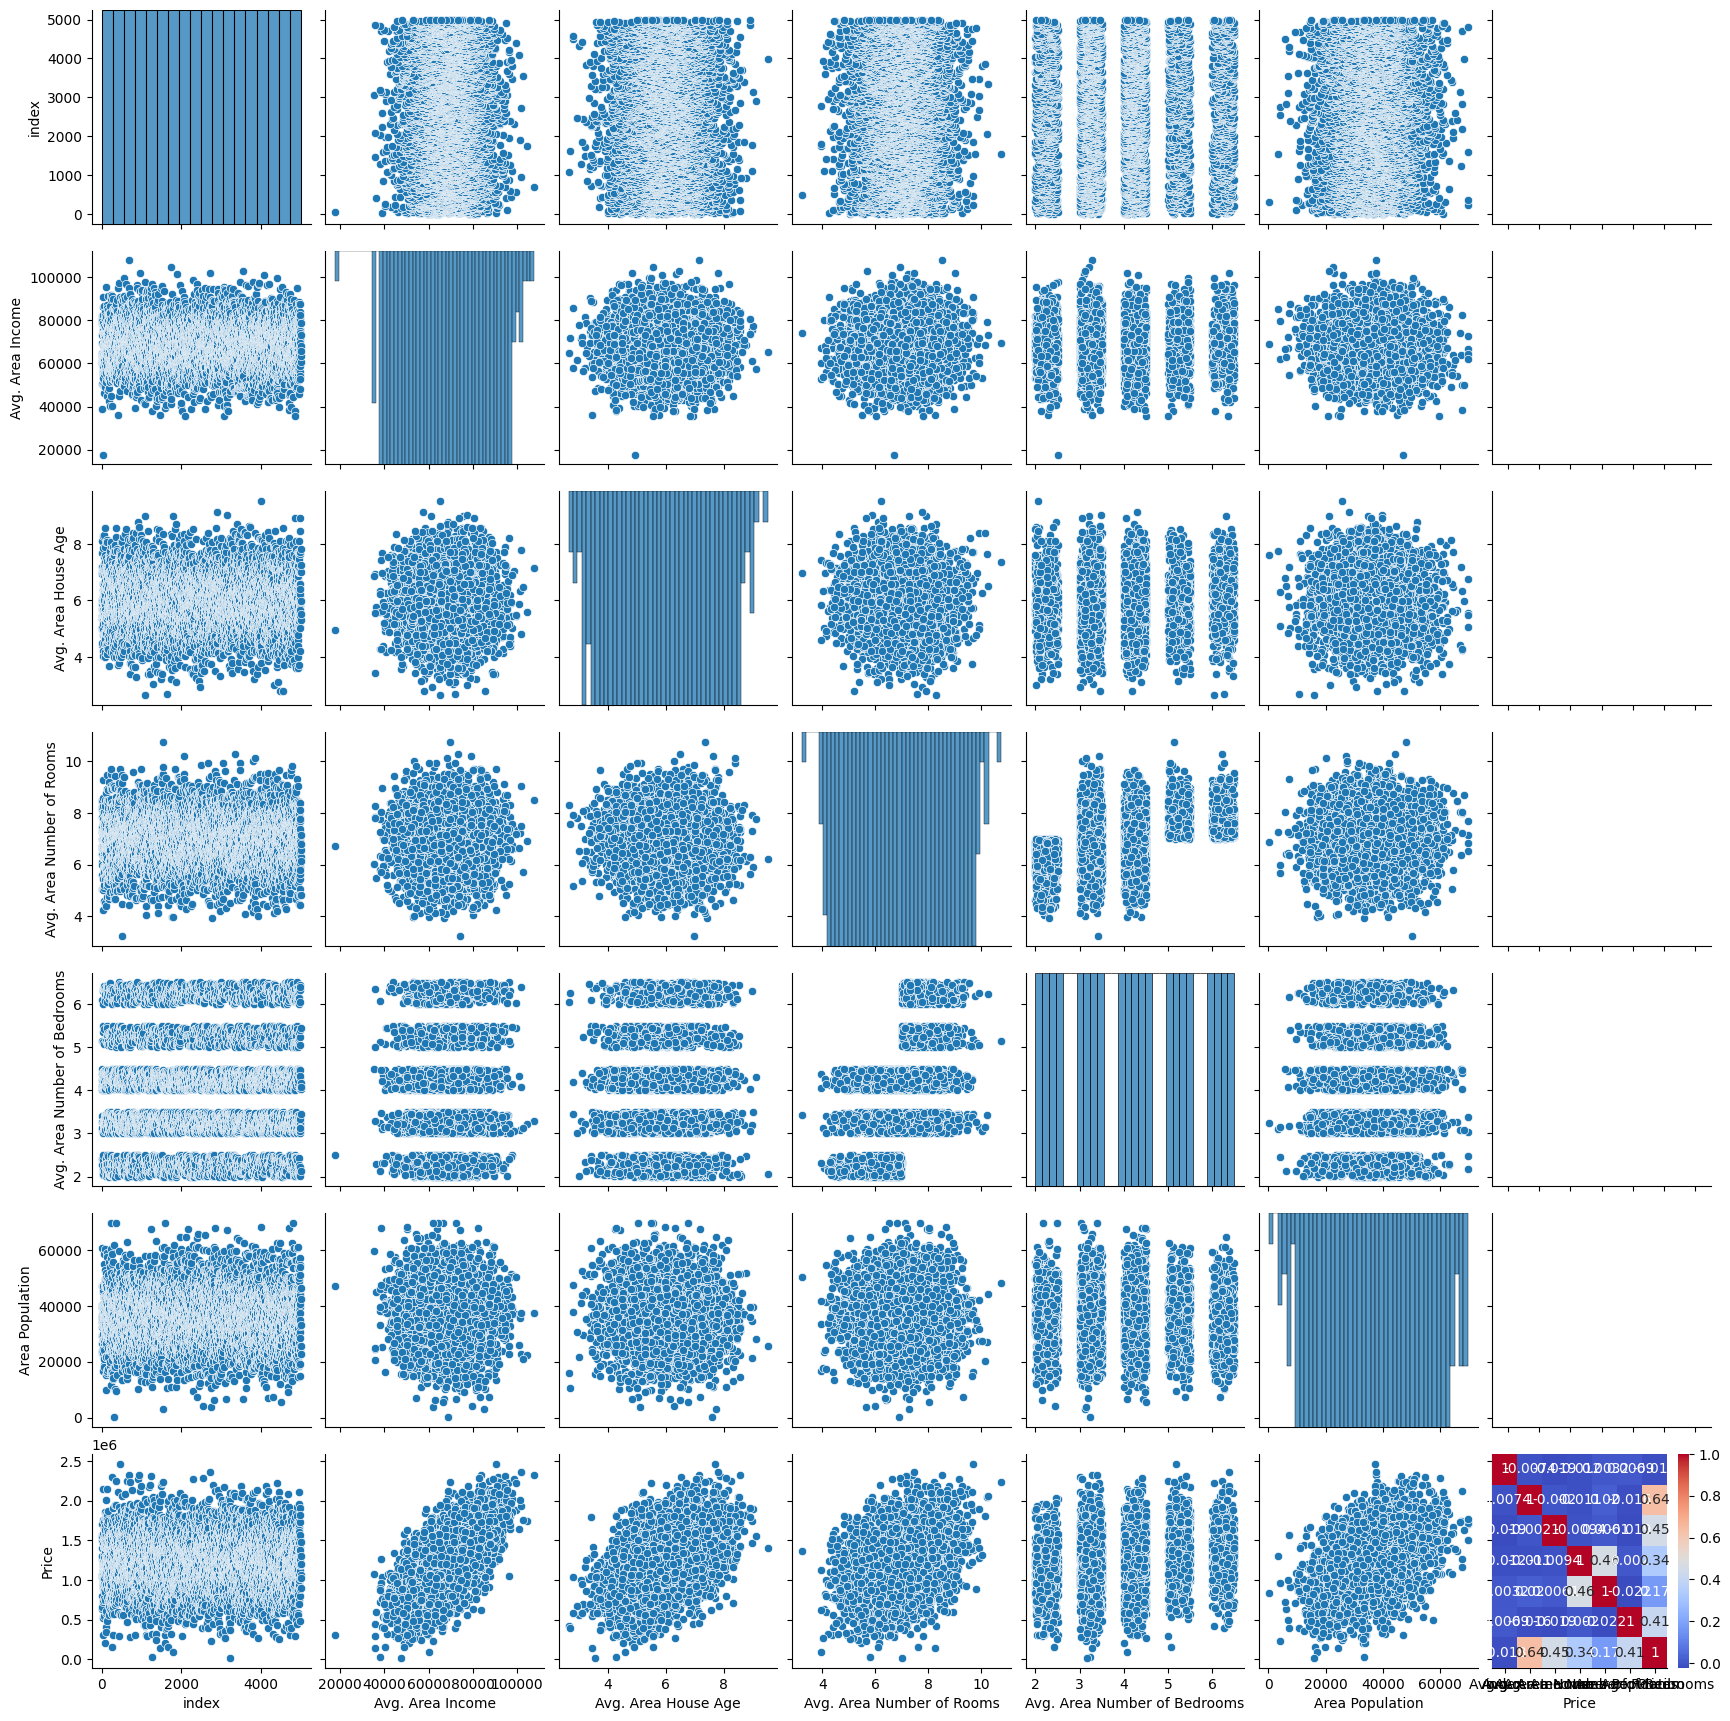

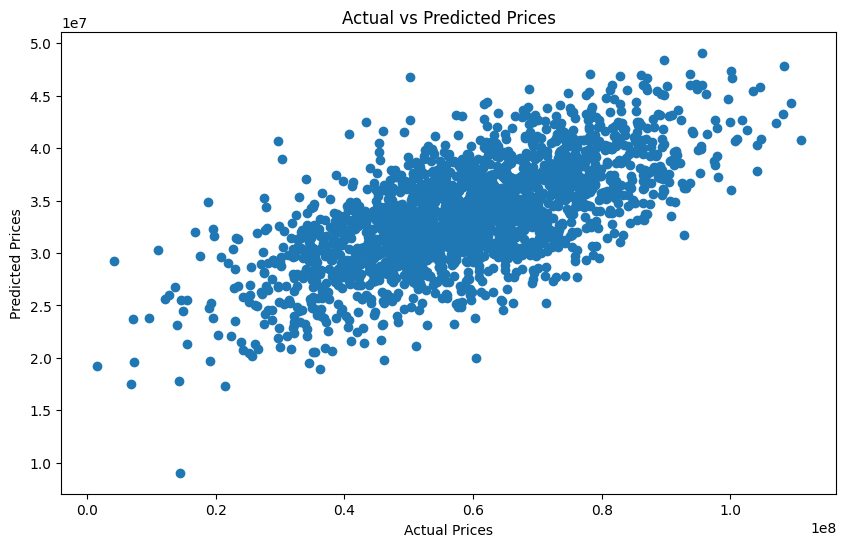

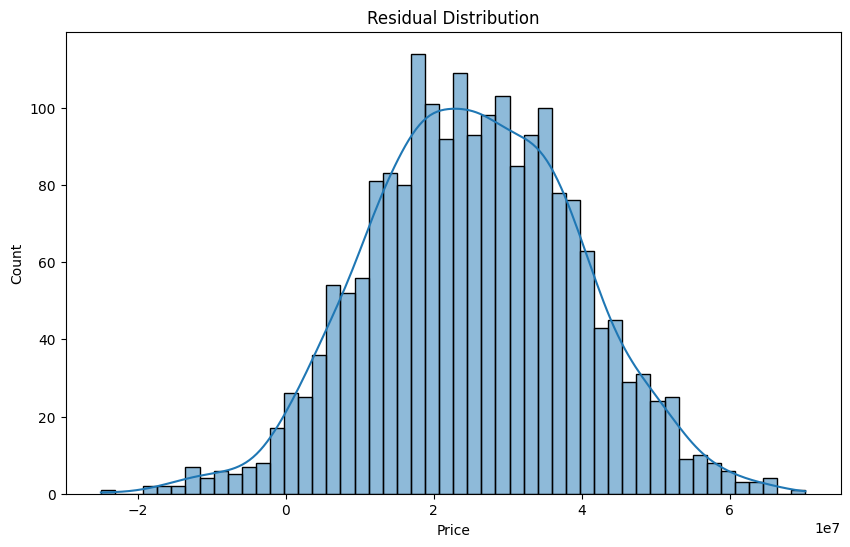

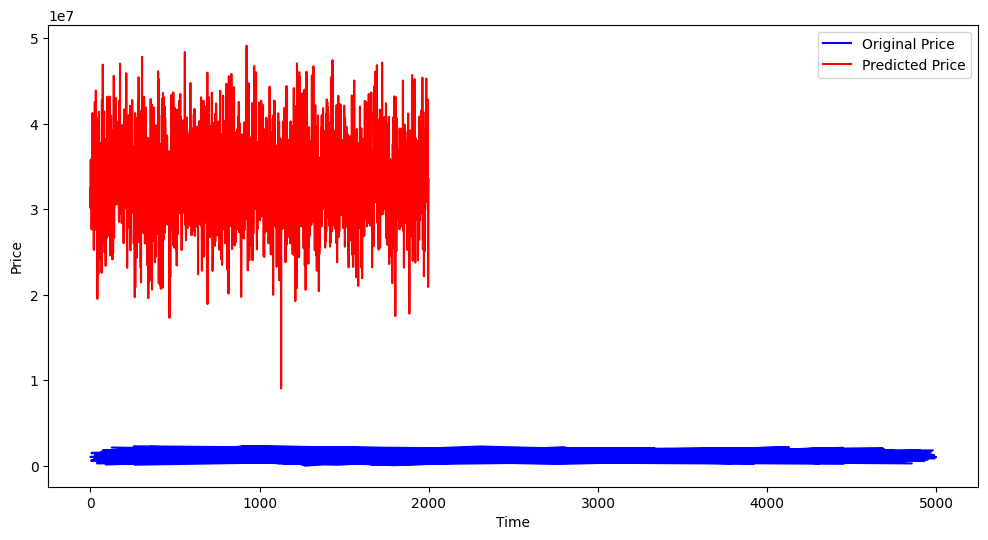

MAE: 540365.3514298544
MSE: 370386573876.23096
RMSE: 608593.9318430894


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Load the dataset
HouseDF = pd.read_csv('/content/USA_Housing.csv')

# Display the first few rows
print(HouseDF.head())

# Reset the index
HouseDF = HouseDF.reset_index()

# Check info and statistics
print(HouseDF.info())
print(HouseDF.describe())

# Display column names
print(HouseDF.columns)

# Pairplot to visualize pairwise relationships
sns.pairplot(HouseDF)

# Histogram of the 'Price' column
sns.histplot(HouseDF['Price'], kde=True)

# Correlation heatmap
sns.heatmap(HouseDF.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')

# Define features and target variable
X = HouseDF[['Avg. Area Income',
             'Avg. Area House Age',
             'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms',
             'Area Population']]
y = HouseDF['Price']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Use Linear Regression Model (not MinMaxScaler)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Train the model
lm.fit(X_train, y_train)

# Print intercept
print("Intercept:", lm.intercept_)

# Create dataframe of coefficients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to training data
model.fit(X_train, y_train, epochs=50)

# Predict on test data
predictions = model.predict(X_test)

# Optional: Rescale if needed (example scale factor)
scale_factor = 1 / 0.02099517
y_predicted = predictions * scale_factor
y_test_scaled = y_test * scale_factor

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_predicted)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot((y_test_scaled - y_predicted.flatten()), bins=50, kde=True)
plt.title("Residual Distribution")
plt.show()
plt. figure (figsize= (12,6))
plt. plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print ('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))



In [ ]:
pip install keras.models
